# COURSE: A deep understanding of deep learning
## SECTION: Metaparameters (activation, batch, optimizers)
### LECTURE: The "wine quality" dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202111

In [16]:
### import libraries

# for DL modeling
import torch
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

# for number-crunching
import numpy as np
import scipy.stats as stats

# for dataset management
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


import torch.nn as nn

import matplotlib.pyplot as plt



In [26]:
from tqdm import tqdm

# Import and process the data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# describe the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# list number of unique values per column

for i in data.keys():
  print(f'{i} has {len(np.unique(data[i]))} unique values')

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


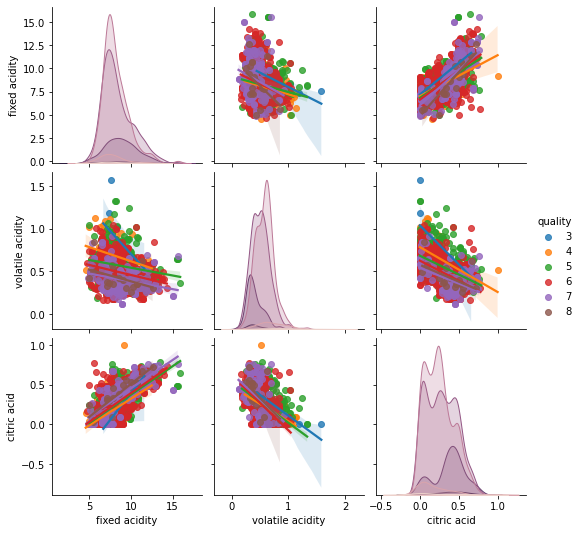

In [5]:
# pairwise plots
cols2plot = ['fixed acidity','volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg',hue='quality')
plt.show()

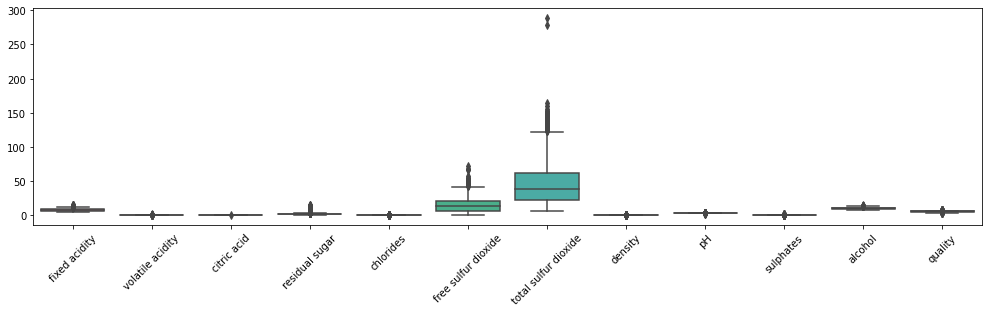

In [6]:
# plot some data
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()


#remove rows with outliers
data = data[data['total sulfur dioxide']<200]

In [7]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
  meanval   = np.mean(data[col])
  stdev     = np.std(data[col],ddof=1)
  data[col] = (data[col]-meanval) / stdev

# can also do more compactly
#data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.652668e-14,-1.793320e-15,5.880498e-15,-9.376066e-16,5.143454e-15,6.366229e-17,-1.349022e-16,3.875624e-13,-2.419966e-15,-1.921236e-15,2.247267e-14,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000


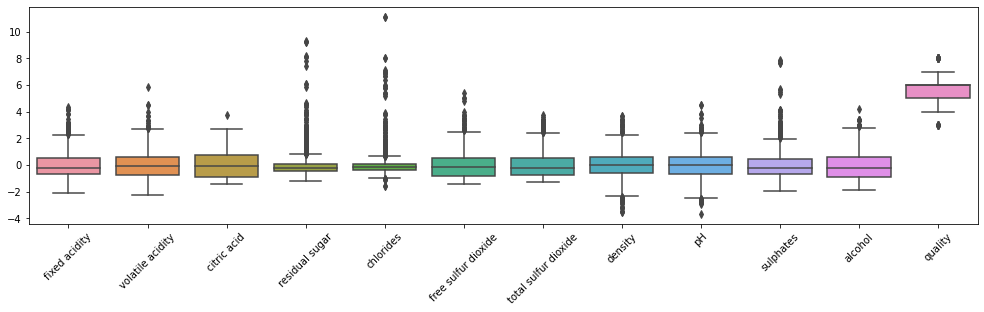

In [8]:
# check the plot again
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

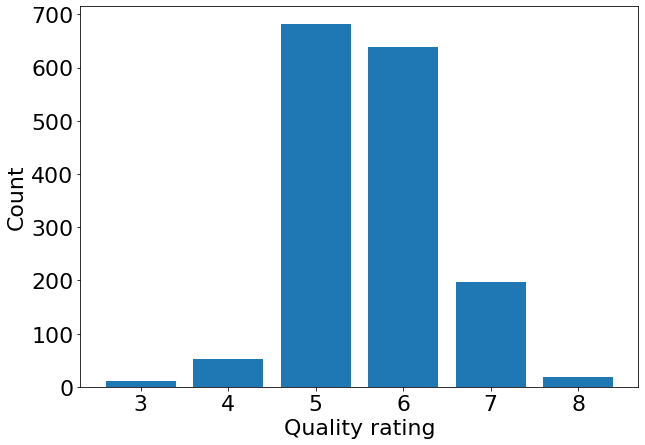

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value,

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [9]:
# distribution quality values
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22}) # increase font size in the figure

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()),counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()

# create a new column for binarized (boolean) quality
data['boolQuality'] = 0
# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

# Re-organize the data: train/test in DataLoaders

In [10]:
# convert from pandas dataframe to tensor
dataT  = torch.tensor( data[cols2zscore].values ).float()
labels = torch.tensor( data['boolQuality'].values ).float()

print( dataT.shape )
print( labels.shape )

# we'll actually need the labels to be a "tensor"
labels = labels[:,None]
print( labels.shape )

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [39]:
# use scikitlearn to split the data
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


# then convert them into PyTorch Datasets (note: already converted to tensors)
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)


# finally, translate into dataloader objects
batchsize    = 64
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last = True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [40]:
# check sizes of data batches
for X,y in train_loader:
  print(X.shape,y.shape)

# go back and set drop_last=True in training DataLoader

torch.Size([512, 11]) torch.Size([512, 1])
torch.Size([512, 11]) torch.Size([512, 1])


In [49]:
def createANewModel():

  # model architecture
  ANNiris = nn.Sequential(
      nn.Linear(11,128),   # input layer
      nn.ReLU(),         # activation unit
      nn.Linear(128,128),  # hidden layer
      nn.ReLU(),         # activation unit
      nn.Linear(128,1),   # output units
        )

  # loss function
  lossfun = nn.CrossEntropyLoss()

  # optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.001)

  return ANNiris,lossfun,optimizer

In [51]:
# train the model

# global parameter
numepochs = 2000

def trainTheModel():

  # initialize accuracies as empties
  trainAcc = []
  testAcc  = []
  losses   = []

  # loop over epochs
  for epochi in tqdm(range(numepochs)):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)
      
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
      batchLoss.append( loss.item() )
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )
    losses.append( np.mean(batchLoss) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )
  
  # function output
  return trainAcc,testAcc,losses

In [43]:
# create a model
ANNiris,lossfun,optimizer = createANewModel()

# train the model
trainAcc,testAcc,losses = trainTheModel()

100%|██████████| 1000/1000 [00:19<00:00, 51.40it/s]


[46.30681818181818, 46.51988636363637, 46.59090909090909, 46.02272727272727, 46.30681818181818, 46.30681818181818, 46.30681818181818, 46.51988636363637, 46.51988636363637, 46.37784090909091, 46.44886363636363, 46.16477272727273, 46.59090909090909, 46.30681818181818, 46.73295454545455, 46.09375, 46.44886363636363, 45.88068181818182, 45.95170454545455, 46.37784090909091, 46.44886363636363, 46.51988636363637, 46.66193181818182, 46.16477272727273, 46.51988636363637, 46.30681818181818, 46.16477272727273, 46.30681818181818, 46.51988636363637, 46.59090909090909, 46.37784090909091, 46.80397727272727, 46.59090909090909, 46.51988636363637, 46.66193181818182, 46.66193181818182, 46.44886363636363, 46.16477272727273, 46.30681818181818, 46.09375, 46.37784090909091, 46.23579545454545, 46.59090909090909, 46.30681818181818, 46.37784090909091, 46.37784090909091, 46.23579545454545, 46.23579545454545, 46.59090909090909, 46.37784090909091, 45.88068181818182, 46.30681818181818, 46.59090909090909, 46.3778409

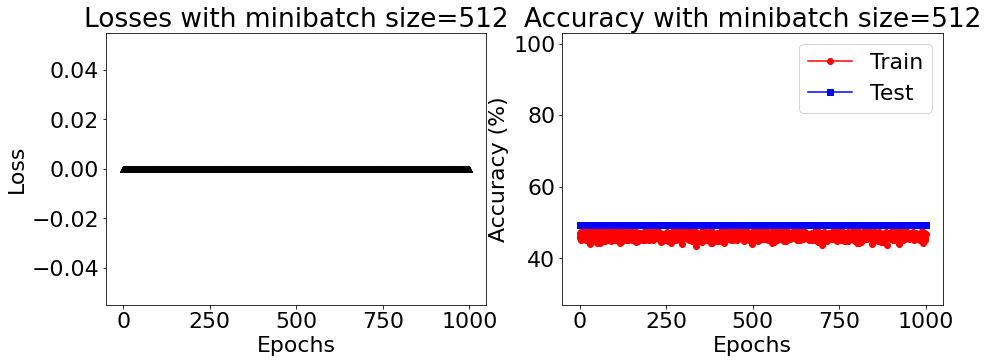

In [44]:
fig,ax = plt.subplots(1,2,figsize=(15,5))


ax[0].plot(losses,'k^-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses with minibatch size=' + str(batchsize))

ax[1].plot(trainAcc,'ro-')
ax[1].plot(testAcc,'bs-')
ax[1].set_title('Accuracy with minibatch size=' + str(batchsize))
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].legend(['Train','Test'])
ax[1].set_ylim([27,103])

plt.show()

In [52]:
batch_sizes = 2**np.arange( 1,7)
batchSizeTrainAcc = []
batchSizeTestAcc = []
batchSizeLoss = []

for batches in (batch_sizes):
  # use scikitlearn to split the data
  train_data,test_data, train_labels,test_labels = train_test_split(dataT, labels, test_size=.1)


  # then convert them into PyTorch Datasets (note: already converted to tensors)
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)


  # finally, translate into dataloader objects

  train_loader = DataLoader(train_data,batch_size=int(batches),shuffle=True,drop_last=True) # drop true becasue batch sizes need to be equal
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0]) # how big should these batches be??
  # create a model
  ANNiris,lossfun,optimizer = createANewModel()

  # train the model
  trainAcc,testAcc,losses = trainTheModel()
  batchSizeTrainAcc.append(trainAcc)
  batchSizeTestAcc.append(testAcc)
  batchSizeLoss.append(losses)


100%|██████████| 2000/2000 [01:00<00:00, 33.02it/s]


(0.0, 100.0)

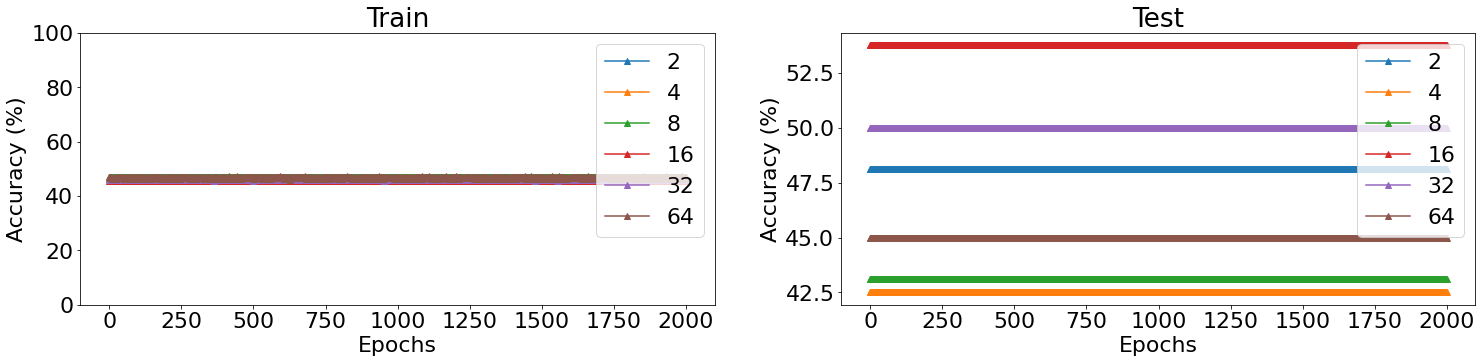

In [58]:
fig, ax = plt.subplots(1,2,figsize = (25,5))
for i in range(batch_sizes.size):
  ax[0].plot((batchSizeTrainAcc[i]),'^-',label = 2**(i+1))
  ax[1].plot((batchSizeTestAcc[i]),'^-',label = 2**(i+1))
ax[0].set_ylabel('Accuracy (%)')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[0].legend()
ax[1].legend()
ax[1].set_title('Test')
ax[0].set_title('Train')
ax[0].set_ylim([0,100])

# Additional explorations

In [ ]:
# 1) In a later video, we will use DL to predict residual sugar. Use seaborn to make a histogram of that data column.
#    Spend a minute to explore the visualization options in sns.histplot. For example, you can add a kernel density 
#    estimate, make the histogram bars purple, and so on.
# 
# 2) (Warning: This exercise is for people who are familiar with statistics.) Loop over all the variables in the dataset,
#    and perform an independent-samples t-test on the data for the binarized wine quality. Which variables are significantly
#    different between "low" and "high" quality wine?
# 